<a href="https://colab.research.google.com/github/Jett987/Machine_Learning/blob/main/DS_Salaries_Clustering_Preprocessing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assigment 3 CMPSC-4983-01 Dr. Reddy's Machine Learning
(all coding was referenced from Dr. Reddy's Data Preprocessing lecture video and Data Preprocessing Example)

# Assignment 3: Machine Learning (CMPSC-4983-01)  

### Jett McDowell

#Removing Missing Values:

The dataset I will be using is Data Science Salaries. The dataset doesn't appear to contain significant amounts of missing data, but I will use the following lines of code to confirm that.

First, I will import the dataset and establish the column names.

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Jett987/Machine_Learning/main/ds_salaries_removed.csv', header=None)
data.columns = ['work_year', 'experience_level', 'employment_type', 'job_title','salary', 'salary_currency', 'salary_in_usd', 'employee_residence','remote_ratio', 'company_location','company_size']

print('Total Number of Records: %d' % (data.shape[0]))
print('Total Number of Features: %d' % (data.shape[1]))
data.head()

Total Number of Records: 3755
Total Number of Features: 11


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Next, I will check the dataset for missing values. The dataset I am using does not appear to have any missing values, but the following lines of code will confirm that.

In [2]:
import numpy as np

data = data.replace('?',np.NaN)

print('Total Number of Records: %d' % (data.shape[0]))
print('Total Number of Features: %d' % (data.shape[1]))
print('Total Number of missing values:')
for col in data.columns:
    print('\n%s: %d' % (col,data[col].isna().sum()))

Total Number of Records: 3755
Total Number of Features: 11
Total Number of missing values:

work_year: 0

experience_level: 0

employment_type: 0

job_title: 0

salary: 0

salary_currency: 0

salary_in_usd: 0

employee_residence: 0

remote_ratio: 0

company_location: 0

company_size: 0


The next line of code is an additional way to check for missing data. Again, the results display no missing data.

In [3]:
print('Total number of rows before removing missing values: %d' % (data.shape[0]))

data2 = data.dropna()
print('Total number of rows after dropping missing values: %d' % (data2.shape[0]))

Total number of rows before removing missing values: 3755
Total number of rows after dropping missing values: 3755


#Checking for Outliers:

Next, I will use box plots to check for any outliers. The first line of code will display the data type associated with each column. I have to make sure the data type is numeric when creating a box plot.

In [4]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Next, I will drop any non-numeric data types, and I will plot the numeric data to check for outliers.

In [5]:
%matplotlib inline

data2 = data.drop(['experience_level','employment_type','job_title','salary_currency','employee_residence','company_location','company_size'],axis=1)
data2.dtypes


work_year        int64
salary           int64
salary_in_usd    int64
remote_ratio     int64
dtype: object

After removing the columns that contained strings, each column contains numeric values.

<Axes: >

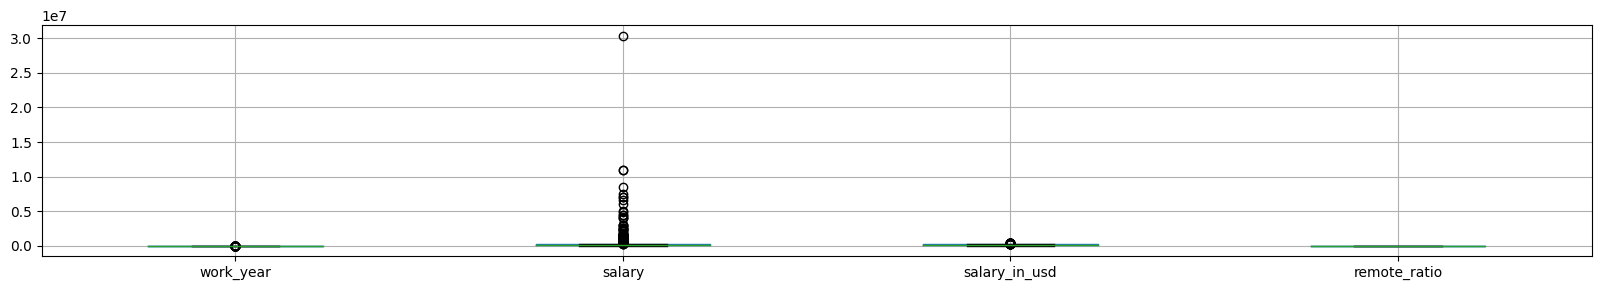

In [6]:
data2.boxplot(figsize=(20,3))

When evaluating the boxplot listed above, the only outliers appear to be in the $salary$ column. Next, I will attempt to resolve the outliers with the following lines of code.

In [7]:
Z = (data2-data2.mean())/data2.std()
Z[1:3755]

,work_year,salary,salary_in_usd,remote_ratio
1,0.905874,-0.239245,-1.705960,1.105771
2,0.905874,-0.245945,-1.777326,1.105771
3,0.905874,-0.023368,0.593597,1.105771
4,0.905874,-0.105252,-0.278649,1.105771
5,0.905874,0.046904,1.342142,-0.952306
...,...,...,...,...
3750,-3.432846,0.329481,4.352183,1.105771
3751,-1.986606,-0.059099,0.212980,1.105771
3752,-3.432846,-0.127585,-0.516534,1.105771
3753,-3.432846,-0.135029,-0.595829,1.105771


In [8]:
print('Total number of rows before removing outliers: %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Total number of rows after removing missing values: %d' % (Z2.shape[0]))

Total number of rows before removing outliers: 3755
Total number of rows after removing missing values: 0


It appears as though the outliers don't exceed the maximum or minimum.

#Checking for Duplicates:

Next, I will now check for duplicated rows.

In [9]:
dups = data.duplicated()
print('Total number of duplicate rows: %d' % (dups.sum()))

Total number of duplicate rows: 1171


There appears to be a lot of duplicated rows, so I will attempt to remove them with the following line of code.

In [10]:
print('Total number of rows before removing duplicates: %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Total number of rows after removing duplicates: %d' % (data2.shape[0]))

Total number of rows before removing duplicates: 3755
Total number of rows after removing duplicates: 2584


#Sampling:

Next, I will execute sampling to review the data. First, I'll start with the first five rows.

In [11]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Next, I will sample three rows without replacement.

In [12]:
sample = data.sample(n=3)
sample

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1377,2023,SE,FT,Data Engineer,133300,USD,133300,US,0,US,M
2766,2022,SE,FT,Data Scientist,191475,USD,191475,US,100,US,M
1040,2023,SE,FT,Data Quality Analyst,72200,USD,72200,US,0,US,M


Next, I will sample at one percent of the data without replacement.

In [13]:
sample = data.sample(frac=0.01, random_state=1)
sample


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2101,2022,SE,FT,Data Scientist,130000,USD,130000,US,0,US,M
2586,2022,SE,FT,Data Scientist,185900,USD,185900,US,0,US,M
3096,2022,MI,FT,Data Engineer,50000,GBP,61566,GB,0,GB,M
1677,2023,SE,FT,Data Scientist,297300,USD,297300,US,100,US,M
3661,2021,SE,FT,Data Analytics Engineer,50000,USD,50000,VN,100,GB,M
2508,2022,SE,FT,Data Operations Analyst,123000,USD,123000,US,0,US,M
846,2023,MI,FT,Research Scientist,150000,USD,150000,US,100,US,M
796,2023,MI,FT,Data Analytics Manager,140000,USD,140000,US,0,US,M
3138,2020,EN,FT,Data Analyst,20000,EUR,22809,PT,100,PT,M
102,2023,SE,FT,Data Analyst,65000,USD,65000,US,0,US,M


Lastly, I will sample one percent with replacement.

In [14]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1061,2023,SE,FT,Data Manager,120000,USD,120000,US,0,US,M
235,2023,SE,FT,Data Engineer,145000,USD,145000,US,0,US,M
1096,2023,SE,FT,Data Engineer,172800,USD,172800,US,0,US,M
905,2023,SE,FT,Machine Learning Engineer,142200,USD,142200,US,0,US,M
2763,2022,SE,FT,Machine Learning Engineer,135000,USD,135000,PR,100,PR,M
3717,2021,SE,FT,Data Engineer,65000,EUR,76833,RO,50,GB,S
2895,2022,SE,FT,Data Scientist,141525,USD,141525,US,100,US,M
960,2023,SE,FT,Data Engineer,160000,USD,160000,US,100,US,M
144,2023,SE,FT,Data Analyst,138900,USD,138900,US,0,US,M
129,2023,MI,FT,Data Analytics Manager,155000,USD,155000,US,0,US,M


#Findings:

The dataset I am using for clustering doesn’t appear to contain missing values, outliers, or duplicates. The sampling lines of code confirmed the previous lines of code by randomly selecting rows and displaying the data within those rows. The dataset appeared mostly clean to begin with, and after attempting preprocessing, it appears as though that observation is correct.

#References:

Chainika Thakar Blog: https://blog.quantinsti.com/data-preprocessing/

Dr. Reddy's example: https://blackboard.ecok.edu/webapps/blackboard/execute/displayLearningUnit?course_id=_24357_1&content_id=_2338686_1&framesetWrapped=true